In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
train_data=pd.read_csv("./Data.csv")
train_data.head()
# train_data.set_index("id")

C:\Users\Mahmoud El Zamly\AppData\Roaming\Python\Python310\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,0,55,165,60,81.0,0.5,0.6,1,1,135,...,40,75,16.5,1,1.0,22,25,27,0,1
1,1,70,165,65,89.0,0.6,0.7,2,2,146,...,57,126,16.2,1,1.1,27,23,37,1,0
2,2,20,170,75,81.0,0.4,0.5,1,1,118,...,45,93,17.4,1,0.8,27,31,53,0,1
3,3,35,180,95,105.0,1.5,1.2,1,1,131,...,38,102,15.9,1,1.0,20,27,30,1,0
4,4,30,165,60,80.5,1.5,1.0,1,1,121,...,44,93,15.4,1,0.8,19,13,17,0,1


In [2]:
y = train_data["smoking"]

In [3]:
zero_counter = 0
one_counter = 0
for c in y:
    if c == 0:
        zero_counter += 1
    else:
        one_counter += 1

print(zero_counter,one_counter)

89603 69653


In [4]:
i = 0
indices = []
while zero_counter > one_counter:
    if y[i] == 0:
        indices.append(i)
        zero_counter -= 1
    i += 1
train_data_str=train_data.drop(indices)

In [5]:
y = train_data_str["smoking"]

zero_counter = 0
one_counter = 0
for c in y:
    if c == 0:
        zero_counter += 1
    else:
        one_counter += 1

print(zero_counter,one_counter)

69653 69653


# Feature Engineering

## Removing outliers using percentile method

In [6]:
# Examining data to see which features might have outliers
pd.set_option('display.max_columns', None)
train_data_str.describe()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,139306.000000,139306.000000,139306.000000,139306.000000,139306.000000,139306.000000,139306.000000,139306.000000,139306.000000,139306.000000,139306.000000,139306.000000,139306.000000,139306.000000,139306.000000,139306.000000,139306.000000,139306.000000,139306.000000,139306.000000,139306.000000,139306.000000,139306.000000,139306.000000
mean,88486.859338,43.986648,165.761058,67.692030,83.283123,1.011001,1.006678,1.023158,1.022555,122.588876,76.982707,98.543666,195.568339,130.335161,55.379058,114.313705,14.877296,1.072868,0.898752,25.581856,26.917678,37.443872,0.203107,0.500000
std,42127.579901,11.768964,8.670183,12.534411,8.896457,0.398468,0.390034,0.150405,0.148479,12.627931,8.949093,15.482807,28.282556,66.800534,13.816325,27.904116,1.408345,0.344714,0.177655,9.597131,18.223460,32.151098,0.402313,0.500002
min,0.000000,20.000000,135.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,77.000000,44.000000,48.000000,77.000000,8.000000,9.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,2.000000,0.000000,0.000000
25%,54776.250000,40.000000,160.000000,60.000000,77.000000,0.800000,0.800000,1.000000,1.000000,114.000000,70.000000,90.000000,175.000000,79.000000,45.000000,95.000000,13.900000,1.000000,0.800000,20.000000,16.000000,19.000000,0.000000,0.000000
50%,89602.500000,40.000000,165.000000,65.000000,83.100000,1.000000,1.000000,1.000000,1.000000,121.000000,78.000000,96.000000,196.000000,118.000000,53.000000,114.000000,15.100000,1.000000,0.900000,24.000000,23.000000,28.000000,0.000000,0.500000
75%,124428.750000,50.000000,170.000000,75.000000,89.000000,1.200000,1.200000,1.000000,1.000000,130.000000,82.000000,104.000000,216.000000,168.000000,64.000000,133.000000,15.900000,1.000000,1.000000,29.000000,33.000000,46.000000,0.000000,1.000000
max,159255.000000,85.000000,190.000000,130.000000,127.000000,9.900000,9.900000,2.000000,2.000000,213.000000,133.000000,375.000000,393.000000,766.000000,135.000000,1860.000000,21.000000,6.000000,9.900000,778.000000,2914.000000,999.000000,1.000000,1.000000


In [7]:
# Get dataset shape before outliers removal to compare it with shape after removal
train_data_str.shape

(139306, 24)

In [8]:
cols = train_data_str.columns
for i in range(1, len(cols)-1):
  if cols[i] not in ['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'hearing(left)', 'hearing(right)', 'Urine protein', 'dental caries']:
    min_threshold, max_threshold = train_data_str[cols[i]].quantile([0.001, 0.999])
    train_data_str = train_data_str[(train_data_str[cols[i]]<max_threshold) & (train_data_str[cols[i]]>min_threshold)]
    print(f"{cols[i]} -> {train_data_str.shape}")

eyesight(left) -> (138078, 24)
eyesight(right) -> (137120, 24)
systolic -> (136319, 24)
relaxation -> (136001, 24)
fasting blood sugar -> (135722, 24)
Cholesterol -> (135425, 24)
triglyceride -> (135112, 24)
HDL -> (134826, 24)
LDL -> (134545, 24)
hemoglobin -> (134257, 24)
serum creatinine -> (133826, 24)
AST -> (133516, 24)
ALT -> (133209, 24)
Gtp -> (132925, 24)


In [9]:
# dataset shape after outlier removal
train_data_str.shape

(132925, 24)

## Applying different normalization methods

### Z-Score Normalization (Standardization)

It transforms the data to have a mean of 0 and a standard deviation of 1. This method is useful when the data has varying scales.

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(train_data_str)
train_data_str = pd.DataFrame(scaled_data, columns=train_data_str.columns)

### Min-Max Scaling (MinMaxScaler)

This method scales the data to a fixed range, usually between 0 and 1.

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(train_data_str)
train_data_str = pd.DataFrame(scaled_data, columns=train_data_str.columns)

In [12]:
train_data_str.describe()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,132925.000000,132925.000000,132925.000000,132925.000000,132925.000000,132925.000000,132925.000000,132925.000000,132925.000000,132925.000000,132925.000000,132925.000000,132925.000000,132925.000000,132925.000000,132925.000000,132925.000000,132925.000000,132925.000000,132925.000000,132925.000000,132925.000000,132925.000000,132925.000000
mean,0.555072,0.368021,0.561028,0.378144,0.425697,0.503365,0.572874,0.022622,0.022012,0.406097,0.434664,0.171633,0.448726,0.285407,0.341653,0.461890,0.652904,0.014264,0.443891,0.186746,0.166049,0.099148,0.202889,0.503404
std,0.264755,0.180439,0.157251,0.124498,0.116048,0.186123,0.212010,0.148695,0.146724,0.156960,0.164606,0.083464,0.160149,0.179752,0.184096,0.171291,0.139868,0.067689,0.188725,0.112182,0.122494,0.096279,0.402152,0.499990
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.343123,0.307692,0.454545,0.300000,0.348684,0.375000,0.428571,0.000000,0.000000,0.294872,0.301887,0.122807,0.329480,0.144809,0.202703,0.331081,0.561224,0.000000,0.333333,0.111111,0.084034,0.037671,0.000000,0.000000
50%,0.562124,0.307692,0.545455,0.350000,0.425000,0.500000,0.571429,0.000000,0.000000,0.397436,0.452830,0.157895,0.450867,0.254098,0.310811,0.459459,0.673469,0.000000,0.444444,0.166667,0.134454,0.071918,0.000000,1.000000
75%,0.780742,0.461538,0.636364,0.450000,0.500000,0.625000,0.714286,0.000000,0.000000,0.500000,0.528302,0.204678,0.566474,0.387978,0.445946,0.587838,0.755102,0.000000,0.555556,0.236111,0.218487,0.130137,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Feature selection

### Information gain

Information gain calculates the reduction in entropy from the transformation of a dataset. It can be used for feature selection by evaluating the Information gain of each variable in the context of the target variable.

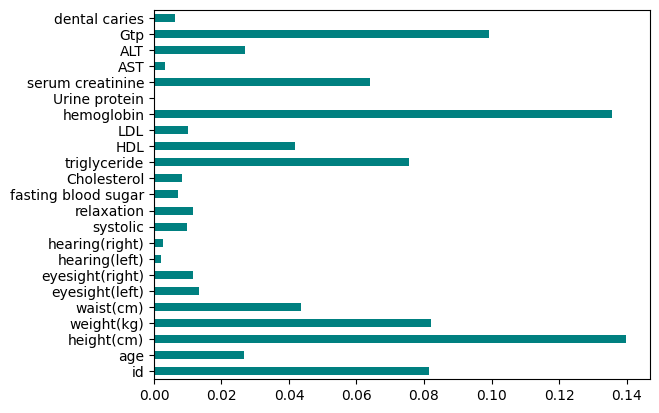

In [13]:
from sklearn.feature_selection import mutual_info_classif

X = train_data_str.iloc[:, :-1].values
y = train_data_str.iloc[:, -1].values

importances = mutual_info_classif(X, y)
feat_importances = pd.Series(importances, train_data_str.columns[0:len(train_data_str.columns)-1])
feat_importances.plot(kind='barh', color='teal')
plt.show()

In [14]:
# Picking 10 features with heighest importance value

features = train_data_str.columns.values
information_gain_selected_features = []

for i in range(0, 11):
  max_importance = max(importances)
  max_importance_index = np.where(importances==max_importance)[0][0]

  if features[max_importance_index] != 'id':
    information_gain_selected_features.append(features[max_importance_index])
  importances[max_importance_index] = 0

In [15]:
print(information_gain_selected_features)
type(train_data_str)

['height(cm)', 'hemoglobin', 'Gtp', 'weight(kg)', 'triglyceride', 'serum creatinine', 'waist(cm)', 'HDL', 'ALT', 'age']


pandas.core.frame.DataFrame

### Correlation Coefficient

Correlation is a measure of the linear relationship between 2 or more variables. Through correlation, we can predict one variable from the other. The logic behind using correlation for feature selection is that good variables correlate highly with the target. Furthermore, variables should be correlated with the target but uncorrelated among themselves.

If two variables are correlated, we can predict one from the other. Therefore, if two features are correlated, the model only needs one, as the second does not add additional information. We will use the Pearson Correlation here.

<AxesSubplot:>

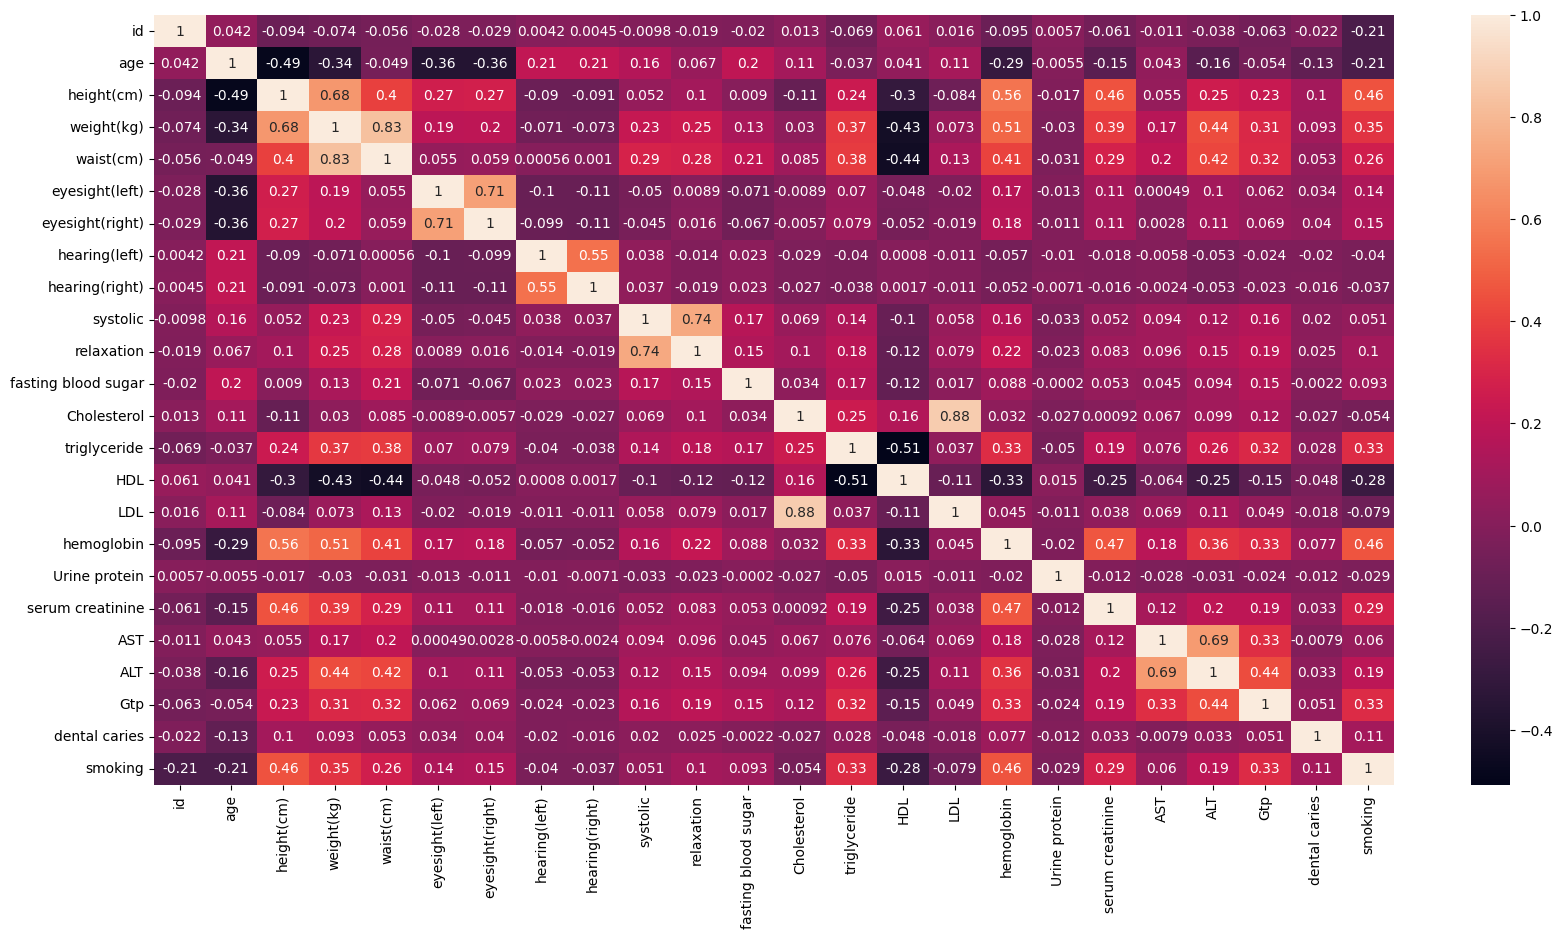

In [16]:
import seaborn as sns
# correlation matrix
correlation = train_data_str.corr()

# Plotting Heatmap
plt.figure(figsize=(20,10))
sns.heatmap(correlation, annot=True)

In [17]:
removed_features = []
features = train_data_str.columns.values
threshold = 0.5

for el_i in features:
  for el_j in features:
    if el_i != el_j and correlation[el_i][el_j] > threshold and el_i not in removed_features and el_j not in removed_features:
      removed_features.append(el_i)

In [18]:
print(removed_features)

['height(cm)', 'weight(kg)', 'eyesight(left)', 'hearing(left)', 'systolic', 'Cholesterol', 'AST']


In [19]:
correlation_coefficient_selected_features = []

for feature in features:
  if feature not in removed_features and feature != 'id':
    correlation_coefficient_selected_features.append(feature)

In [20]:
print(correlation_coefficient_selected_features)

['age', 'waist(cm)', 'eyesight(right)', 'hearing(right)', 'relaxation', 'fasting blood sugar', 'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'ALT', 'Gtp', 'dental caries', 'smoking']


### Selecting common features from both feature selection approaches

In [21]:
selected_features = []

for feature in correlation_coefficient_selected_features:
  if feature in information_gain_selected_features:
    selected_features.append(feature)

In [22]:
print(selected_features)

['age', 'waist(cm)', 'triglyceride', 'HDL', 'hemoglobin', 'serum creatinine', 'ALT', 'Gtp']


# Remove the features that is not affecting the prediction


In [23]:
removed_features=list(set(cols)-set(selected_features))
print(removed_features)
x=train_data_str.drop(removed_features,axis="columns")
x.shape

['eyesight(left)', 'smoking', 'fasting blood sugar', 'hearing(right)', 'relaxation', 'dental caries', 'Cholesterol', 'hearing(left)', 'eyesight(right)', 'weight(kg)', 'systolic', 'id', 'Urine protein', 'height(cm)', 'LDL', 'AST']


(132925, 8)

# Splitting the data 

In [24]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,test_size=0.3,random_state=10)
x_test,x_valid,y_test,y_valid=train_test_split(x_test,y_test,stratify=y_test,test_size=0.5,random_state=10)
x_train.shape

(93047, 8)

In [25]:
type(y_train.shape[0])
x_train.index.all

<bound method Index.all of Int64Index([ 95852,  62050,  94977, 112026,  16280,  35109,  15075,  50332,
              3877,  25868,
            ...
            108269,  56762, 112423,  90907,  89902,  96779, 106473,  28148,
             66878,  15892],
           dtype='int64', length=93047)>

# implementing Bagging

In [26]:
import random
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
train_scores=[]
test_scores=[]

#get the indices of dataframe
row_indices = x_train.index.tolist()

print(row_indices)
# training a 100 model on different samples of dataset
for j in range(0,5):
    model=DecisionTreeClassifier(max_depth=8)
    x_sample=[]
    sample=[]
    
    size =random.randrange(int(0.4*y_train.shape[0]),int(0.7*y_train.shape[0]))
    for i in range(0,size):
        num=random.randint(0,y_train.shape[0]-1)
        x_sample.append(row_indices[num])
        sample.append(num)
    
    x_sample=x_train.loc[x_sample]
    y_sample=y_train[sample]
    model.fit(x_sample,y_sample)
    train_scores.append(model.score(x_sample,y_sample))
    test_scores.append(model.score(x_test,y_test))


[95852, 62050, 94977, 112026, 16280, 35109, 15075, 50332, 3877, 25868, 20612, 74333, 96693, 20844, 112332, 65900, 23251, 55090, 22015, 109421, 3025, 55567, 103024, 60972, 29245, 51002, 43347, 49373, 78458, 21369, 50839, 114205, 83430, 19798, 32373, 18591, 6302, 70821, 86999, 51851, 115222, 89469, 53367, 74192, 8356, 73684, 11687, 78687, 54974, 2093, 1763, 72963, 54025, 59089, 117860, 87585, 78194, 120858, 25158, 26287, 49431, 81758, 73202, 57413, 15170, 74594, 90062, 128345, 75095, 101665, 37531, 44355, 132279, 62582, 11160, 76892, 70743, 42011, 7500, 5011, 65729, 42728, 217, 46263, 105283, 55385, 102784, 113361, 53686, 55030, 52206, 115361, 63122, 111866, 31011, 115390, 77590, 101802, 9427, 77064, 58909, 68871, 25300, 62368, 36418, 23534, 7764, 125354, 8394, 69253, 116358, 23492, 82588, 19746, 85861, 36464, 87817, 103564, 30421, 91160, 114084, 35626, 73546, 58780, 69948, 77336, 114792, 113341, 18920, 97849, 53775, 73837, 46380, 66986, 67332, 40530, 62320, 21094, 7054, 22161, 78639, 11

In [27]:
type(x_train.head)
x_train.head

<bound method NDFrame.head of              age  waist(cm)  triglyceride       HDL  hemoglobin  \
95852   0.307692   0.302632      0.062842  0.364865    0.500000   
62050   0.384615   0.355263      0.054645  0.135135    0.500000   
94977   0.384615   0.565789      0.401639  0.121622    0.806122   
112026  0.538462   0.572368      0.232240  0.229730    0.653061   
16280   0.307692   0.776316      0.352459  0.216216    0.724490   
...          ...        ...           ...       ...         ...   
96779   0.307692   0.486842      0.786885  0.013514    0.683673   
106473  0.384615   0.328947      0.125683  0.797297    0.551020   
28148   0.307692   0.302632      0.057377  0.432432    0.653061   
66878   0.615385   0.528947      0.418033  0.121622    0.816327   
15892   0.461538   0.500000      0.322404  0.216216    0.653061   

        serum creatinine       ALT       Gtp  
95852           0.333333  0.050420  0.030822  
62050           0.222222  0.025210  0.023973  
94977           0.333333

In [28]:
from sklearn.metrics import accuracy_score
import random
from sklearn.tree import DecisionTreeClassifier
class Bagging_implemented:
    def __init__(self,estimators,tree_depth):
        self.estimators=estimators
        self.tree_depth=tree_depth
        self.models=[DecisionTreeClassifier(max_depth=self.tree_depth) for i in range(0,self.estimators)]
        pass
    
    
    
    def fit(self,x_train,y_train):
        row_indices = x_train.index.tolist()
        for j in range(0,self.estimators):            
            x_sample=[]
            y_sample=[]
            
            size =random.randrange(int(0.4*y_train.shape[0]),int(0.6*y_train.shape[0]))
            for i in range(0,size):
                num=random.randint(0,y_train.shape[0]-1)
                x_sample.append(row_indices[num])
                y_sample.append(num)
            
            x_sample=x_train.loc[x_sample]
            y_sample=y_train[y_sample]
            self.models[j].fit(x_sample,y_sample)

    def prediction(self,x):
        zeros=np.zeros(x.shape[0])
        ones=np.zeros(x.shape[0])
        Y_pred_tot=[]
        for j in range(0,self.estimators):
            y_pred=self.models[j].predict(x)
            for i in range(0,len(y_pred)):
                if y_pred[i]==0:
                    zeros[i]+=1;
                else:
                    ones[i]+=1
        for i in range(0,x.shape[0]):
            if zeros[i]<=ones[i]:
                Y_pred_tot.append(1)
            else:
                Y_pred_tot.append(0)
        
        return Y_pred_tot
    def accuracy(self,x,y):
        y_predicted=self.prediction(x)
        
        return accuracy_score(y,y_predicted)
        

    pass





In [29]:
p=Bagging_implemented(150,9)
p.fit(x_train,y_train)
print(p.accuracy(x_train,y_train))
print(p.accuracy(x_test,y_test))


0.7749739379023505
0.7650835046893024


In [30]:
from numpy import mean
import math


print(x_sample.shape,y_sample.shape)
print(x_train.shape,y_train.shape)
print(mean(train_scores))
print(mean(test_scores))


(42838, 8) (42838,)
(93047, 8) (93047,)
0.7709536257646918
0.7479010983499674


In [31]:
# Importing the Numpy Package
import numpy as np
import math

# Numpy Array
scores = np.array([100,67,92,87,66,89,76,22])

# Getting indices of N = 3 maximum values
x = np.argsort(scores)[::-1][:3]
print("Indices:",x)

# Getting N maximum values
print("Values:",scores[x])

Indices: [0 2 5]
Values: [100  92  89]


# Implementing Boosting

In [32]:
from sklearn.metrics import accuracy_score
import random
from sklearn.tree import DecisionTreeClassifier
class Boosting_implemented:
    def __init__(self,estimators,tree_depth):
        self.estimators=estimators
        self.tree_depth=tree_depth
        self.models=[DecisionTreeClassifier(max_depth=self.tree_depth) for i in range(0,self.estimators)]
        self.calssifierCoeff=[]
        self.err=[]
        pass
    
    
    
    def fit(self,x_train,y_train):
        row_indices = x_train.index.tolist()
        weights=np.ones(y_train.shape)/y_train.shape[0]
        for j in range(0,self.estimators):
            
        
            x_sample=[]
            y_sample=[]
            WEIGHT_sample=[]
            size =random.randrange(int(0.3*y_train.shape[0]),int(0.6*y_train.shape[0]))
            samples = np.argsort(weights)[::-1][:size]
            

            # for i in range(0,size):
            #     num=random.randint(0,y_train.shape[0]-1)
            #     x_sample.append(row_indices[num])
            #     y_sample.append(num)
            #     WEIGHT_sample.append(num)
            store=samples
            y_store=samples
            
            x_store=[]
            for i in range(0,samples.shape[0]):
                x_store.append(row_indices[samples[i]])

            x_sample=x_train.loc[x_store]
            y_sample=y_train[samples]
            WEIGHT_sample=weights[samples]
            self.models[j].fit(x_sample,y_sample,sample_weight=WEIGHT_sample)

            y_predict=self.models[j].predict(x_sample)
            w=0
            wt=0
            for i in range(0,len(store)):
                if y_predict[i]!=y_train[y_store[i]]:
                    w+=WEIGHT_sample[i]
                wt+=WEIGHT_sample[i]
            error=w/wt
            self.err.append(error)
            self.calssifierCoeff.append(math.log((1-self.err[j])/self.err[j],10))
            for k in range(0,len(store)):
                if y_predict[k]==y_train[y_store[k]]:
                    weights[y_store[k]]*= pow(math.e,-1*self.calssifierCoeff[j]* (y_train[y_store[k]]==y_predict[k]))
                else:
                    weights[y_store[k]]*= pow(math.e,-1*self.calssifierCoeff[j]* -1)  
    

    def prediction(self,x):
        zeros=np.zeros(x.shape[0])
        ones=np.zeros(x.shape[0])
        Y_pred_tot=[]
        for j in range(0,self.estimators):
            y_pred=self.models[j].predict(x)
            for i in range(0,len(y_pred)):
                if y_pred[i]==0:
                    zeros[i]+=1;
                else:
                    ones[i]+=1
        for i in range(0,x.shape[0]):
            if zeros[i]<=ones[i]:
                Y_pred_tot.append(1)
            else:
                Y_pred_tot.append(0)
        



        return Y_pred_tot
    
    def calc_total_acc(self,x,y):
        
        for i in range(0,self.estimators):
            m_predict=self.models[i].predict(x)
            for j in range(0,len(m_predict)):
                if m_predict[j]==0:
                    m_predict[j]=-1

            if i==0:            
                y_pred_tot=self.calssifierCoeff[0] * m_predict
            else:
                y_pred_tot+=self.calssifierCoeff[i]*m_predict
                
        y_pred_tot=np.sign(y_pred_tot)
            
        for j in range(0,len(y_pred_tot)):
            if y_pred_tot[j]==-1:
                y_pred_tot[j]=0

    


        return accuracy_score(y,y_pred_tot)

        pass
    
        

    pass

In [33]:
boost=Boosting_implemented(20,2)
boost.fit(x_train,y_train)
print(boost.calc_total_acc(x_train,y_train))
print(boost.calc_total_acc(x_test,y_test))

0.7387771771255387
0.7398064095491248


# Hyperparameter tuning for boosting Grid search

In [34]:
nums_estimators=[10,50,100,250,1000]
nums_tree_depth=[1,2,4,6,7]
accuracy_training=[]
accuracy_testing=[]



for i in range(0,len(nums_tree_depth)):
    train_acc_specific_depth=[]
    test_acc_specific_depth=[]
    for j in range(0,len(nums_estimators)):
        booster=Boosting_implemented(nums_estimators[j],nums_tree_depth[i])
        booster.fit(x_train,y_train)
        train_acc_specific_depth.append(booster.calc_total_acc(x_train,y_train))
        test_acc_specific_depth.append(booster.calc_total_acc(x_test,y_test))
        booster=0
    print(train_acc_specific_depth)
    print(test_acc_specific_depth)
    accuracy_training.append(train_acc_specific_depth)
    accuracy_testing.append(test_acc_specific_depth)


KeyboardInterrupt: 

# calc the accuracy of all models


# use the model and the weights to test


# Boosting

In [35]:
from sklearn.pipeline import Pipeline
from category_encoders.target_encoder import TargetEncoder
from xgboost import XGBClassifier

estimators=[('encoder',TargetEncoder()),
            ('clf',XGBClassifier(random_state=8))
            ]
pipe=Pipeline(steps=estimators)

pipe


Pipeline(steps=[('encoder', TargetEncoder()),
                ('clf',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=8, ...))])

# Another way for Boosting

In [39]:
from random import randint, uniform
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.metrics import accuracy_score

# Create a base classifier (weak learner)
base_classifier = DecisionTreeClassifier(max_depth=2)

# Create the AdaBoost classifier
boosting_classifier = AdaBoostClassifier(base_estimator=base_classifier, n_estimators=20, random_state=42)

# Fit the boosting classifier to the training data
boosting_classifier.fit(x_train, y_train)

# Make predictions on the test data
y_pred = boosting_classifier.predict(x_test)

# Evaluate the accuracy of the boosting classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
param_grid = {
    'n_estimators': [50, 100, 150,700],
    'learning_rate': [0.1, 0.5, 1.0,3.0]
}

# Perform Grid Search to find the best hyperparameters
grid_search = GridSearchCV(boosting_classifier, param_grid, cv=5)
grid_search.fit(x_train, y_train)

# Get the best hyperparameters and fit the classifier with them
best_params1 = grid_search.best_params_
boosting_classifier.set_params(**best_params1)
boosting_classifier.fit(x_train, y_train)

# Make predictions on the test data
y_pred = boosting_classifier.predict(x_test)

# Evaluate the accuracy of the boosting classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy (Grid Search):", accuracy)



Accuracy: 0.7591654546366418
Accuracy (Grid Search): 0.7732082852700737


In [40]:
print(best_params1)

{'learning_rate': 0.5, 'n_estimators': 700}


In [41]:
import random
estimators_list=[]
lr=[]
# Define the parameter distributions for Randomized Search
for i in range(0,4):
    number = random.randint(1, 1000)
    l= random.randint(1, 100)
    estimators_list.append(number)
    lr.append(l/100)
param_distributions = {
    'n_estimators': estimators_list,
    'learning_rate': lr
}

# Perform Randomized Search to find the best hyperparameters
randomized_search = RandomizedSearchCV(boosting_classifier, param_distributions, n_iter=10, cv=5)
randomized_search.fit(x_train, y_train)

# Get the best hyperparameters and fit the classifier with them
best_params = randomized_search.best_params_
boosting_classifier.set_params(**best_params)
boosting_classifier.fit(x_train, y_train)

# Make predictions on the test data
y_pred = boosting_classifier.predict(x_test)

# Evaluate the accuracy of the boosting classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy (Randomized Search):", accuracy)


Accuracy (Randomized Search): 0.7738602738351974


In [42]:
print(best_params)

{'n_estimators': 930, 'learning_rate': 0.41}
